In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('FC Barcelona Statistics.csv')

In [7]:
data.head()

,Date,Opponent,Home/Away,Competition,Goals Scored,Goals Conceded,Possession (%),Shots on Target,xG,Pass Accuracy (%),Tackles Won,Key Passes,Result,Injury Impact (%),Rest Days Before Match,Opponent Strength (ELO Rating),Weather Conditions,Managerial Change (Yes/No)
0,01-01-2020,Villarreal,Home,Copa del Rey,5,4,67,1,1.40,93,11,3,Win,23,9,1714,Windy,Yes
1,11-01-2020,Mallorca,Home,Copa del Rey,2,3,53,4,3.25,88,17,14,Loss,0,9,1681,Cold,Yes
2,21-01-2020,Real Madrid,Home,La Liga,0,4,56,10,2.94,83,6,3,Loss,17,10,1752,Sunny,Yes
3,25-01-2020,Mallorca,Away,La Liga,4,5,71,2,2.97,89,5,14,Loss,25,8,1514,Cold,Yes
4,28-01-2020,Valencia,Home,Champions League,1,0,66,1,2.96,88,20,13,Win,10,3,1852,Windy,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            200 non-null    object 
 1   Opponent                        200 non-null    object 
 2   Home/Away                       200 non-null    object 
 3   Competition                     200 non-null    object 
 4   Goals Scored                    200 non-null    int64  
 5   Goals Conceded                  200 non-null    int64  
 6   Possession (%)                  200 non-null    int64  
 7   Shots on Target                 200 non-null    int64  
 8   xG                              200 non-null    float64
 9   Pass Accuracy (%)               200 non-null    int64  
 10  Tackles Won                     200 non-null    int64  
 11  Key Passes                      200 non-null    int64  
 12  Result                          200 

In [9]:
data.describe()

,Goals Scored,Goals Conceded,Possession (%),Shots on Target,xG,Pass Accuracy (%),Tackles Won,Key Passes,Injury Impact (%),Rest Days Before Match,Opponent Strength (ELO Rating)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,2.440000,2.465000,59.915000,5.810000,2.041550,87.415000,12.615000,9.285000,15.340000,6.605000,1762.31500
std,1.738248,1.744705,8.573523,2.926898,0.907535,4.739736,4.757092,3.679875,8.809223,2.312078,140.19572
min,0.000000,0.000000,45.000000,1.000000,0.510000,80.000000,5.000000,3.000000,0.000000,3.000000,1504.00000
25%,1.000000,1.000000,53.000000,3.000000,1.237500,83.000000,9.000000,6.000000,8.000000,4.750000,1647.75000
50%,2.000000,3.000000,59.000000,6.000000,2.035000,88.000000,12.000000,10.000000,16.000000,7.000000,1765.50000
75%,4.000000,4.000000,67.000000,8.000000,2.880000,91.000000,17.000000,13.000000,22.250000,9.000000,1865.25000
max,5.000000,5.000000,75.000000,10.000000,3.500000,95.000000,20.000000,15.000000,30.000000,10.000000,2000.00000


## Results Bar Chart

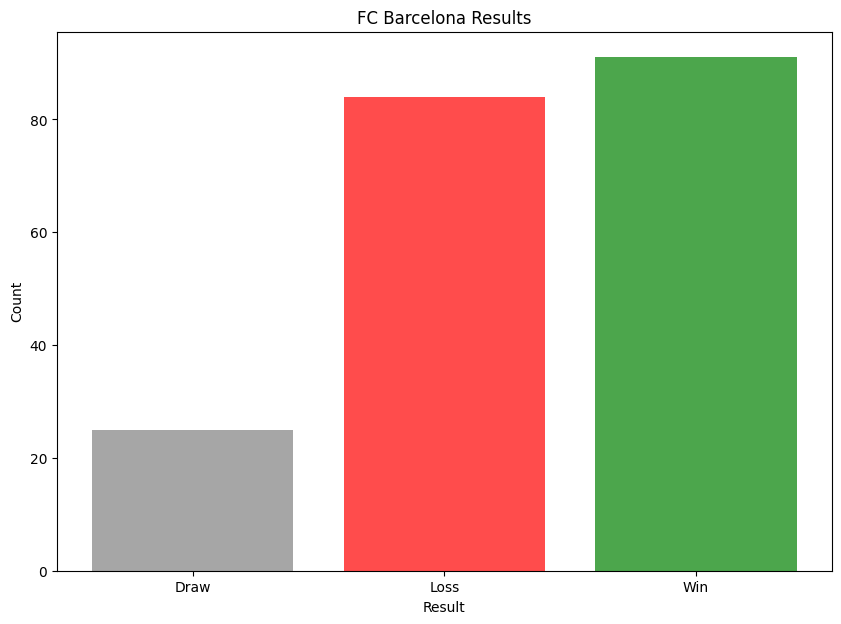

In [10]:
results = data.groupby('Result')['Result'].count()
plt.figure(figsize=(10, 7))	
plt.bar(results.index, results.values, color=('grey', 'red', 'green'), alpha=0.7)
plt.title('FC Barcelona Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 3 with shape (14,).

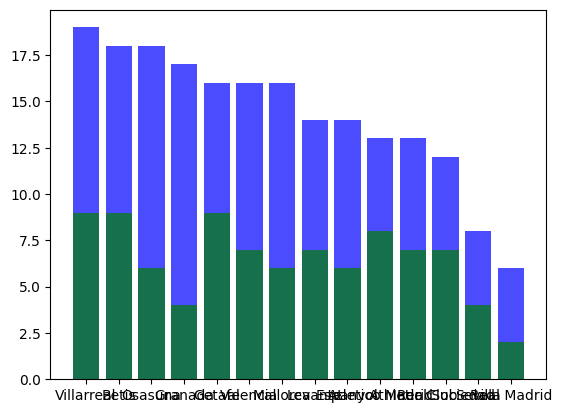

In [11]:
# data.groupby('Opponent')['Result'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 7), color='blue', alpha=0.7)
opponents_matches  = data.groupby('Opponent')['Result'].count().sort_values(ascending=False)
win_data = data[data['Result'] == 'Win']['Opponent'].value_counts()
draw_data = data[data['Result'] == 'Draw']['Opponent'].value_counts()
loss_data = data[data['Result'] == 'Draw']['Opponent'].value_counts()

plt.bar(opponents_matches.index, opponents_matches.values, color='blue', alpha=0.7)
plt.bar(win_data.index, data[data['Result'] == 'Win']['Opponent'].value_counts().values, color='green', alpha=0.7)
# how to append the draw on top of the win
plt.bar(draw_data.index, draw_data.values, bottom=win_data.values,  color='grey', alpha=0.7)
plt.bar(loss_data.index, loss_data.values,  color='grey', alpha=0.7)
plt.title('FC Barcelona Opponents')

In [1]:
pd.DataFrame(opponents_matches)

NameError: name 'pd' is not defined

In [ ]:
win_data

Opponent
Villarreal         9
Getafe             9
Betis              9
Atletico Madrid    8
Valencia           7
Real Sociedad      7
Levante            7
Athletic Club      7
Osasuna            6
Mallorca           6
Espanyol           6
Sevilla            4
Granada            4
Real Madrid        2
Name: count, dtype: int64

### Win Sorting on Teams


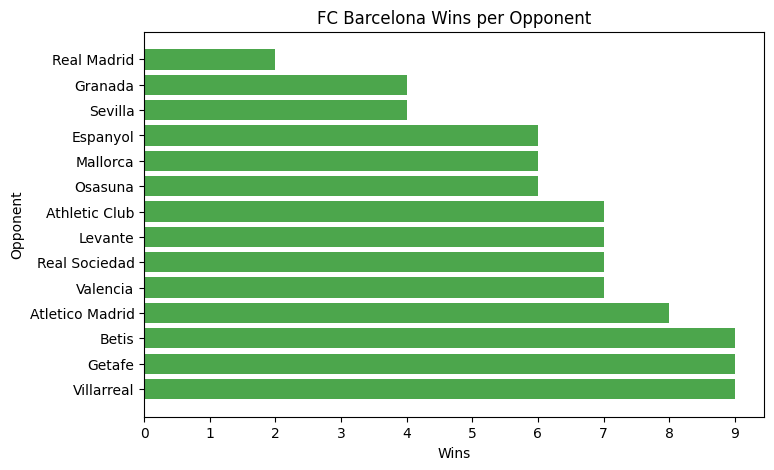

In [ ]:
wins_per_team = data[data['Result'] == 'Win']['Opponent'].value_counts()

plt.figure(figsize=(8,5))
plt.barh(wins_per_team.index, wins_per_team.values, color='green', alpha=0.7)
# changing the horizontal axis scale to start from 0 and increase by 1
plt.xticks(range(0, max(wins_per_team.values)+1, 1))
plt.xlabel('Wins')
plt.ylabel('Opponent')
plt.title('FC Barcelona Wins per Opponent')
plt.show()


### Results on different weather Conditions

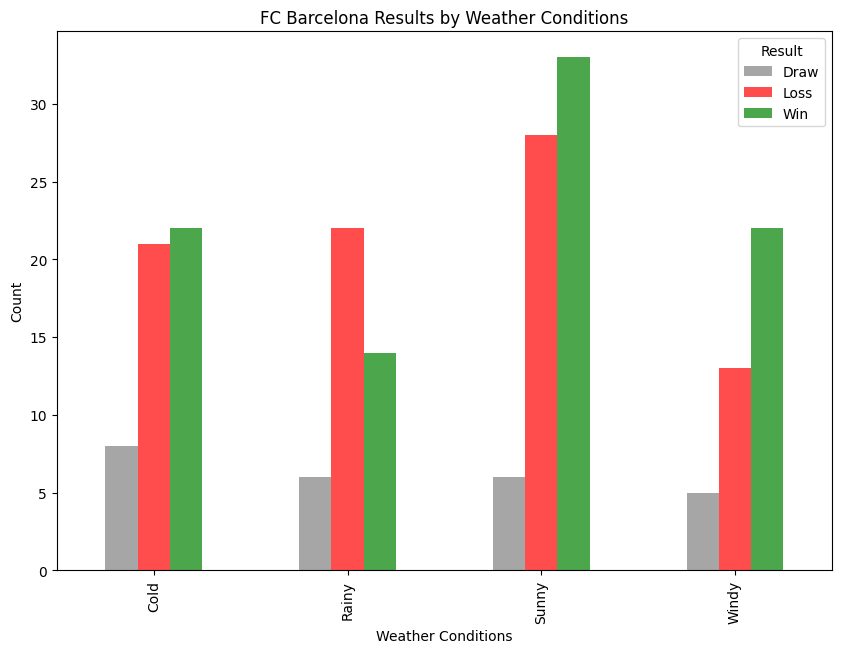

In [ ]:
weather_results = data.groupby('Weather Conditions')['Result'].value_counts().unstack()
weather_results.plot(kind='bar', figsize=(10, 7), color=('grey', 'red', 'green'), alpha=0.7)
plt.title('FC Barcelona Results by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()




In [ ]:
data['Weather Conditions']

0      Windy
1       Cold
2      Sunny
3       Cold
4      Windy
       ...  
195    Rainy
196    Sunny
197    Sunny
198    Sunny
199    Rainy
Name: Weather Conditions, Length: 200, dtype: object

In [ ]:
library = pd.read_csv('C:\Users\user\Downloads\Libraries_-_2025_Holds_Placed_by_Location.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1622644797.py, line 1)

data